In [2]:
import pandas as pd

results_path = '/home/cmf21/pytorch_save/output_for_draft/gfrc_rgb_baseline2_results.csv'

gfrc_results = pd.read_csv(results_path)

gfrc_results

,xmn,xmx,ymn,ymx,conf,filename,confmat,tru_box,pred_class,tru_class
0,1163,1204,1125,1160,0.486770,Z108_Img01032.jpg,FP,NaN,1.0,0.0
1,717,786,190,226,0.235606,Z108_Img01032.jpg,FP,NaN,1.0,0.0
2,4574,4602,934,962,0.332196,Z108_Img01032.jpg,FP,NaN,1.0,0.0
3,4222,4256,2976,2999,0.304438,Z108_Img01032.jpg,FP,NaN,1.0,0.0
4,2747,2783,1060,1096,0.287714,Z108_Img01032.jpg,FP,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4356,1603,1637,1133,1164,1.000000,Z110_Img02134.jpg,FN,NaN,0.0,2.0
4357,1965,1979,479,502,1.000000,Z110_Img02134.jpg,FN,NaN,0.0,6.0
4358,1970,1985,485,510,1.000000,Z110_Img02134.jpg,FN,NaN,0.0,6.0
4359,1666,1694,1251,1282,1.000000,Z110_Img02134.jpg,FN,NaN,0.0,2.0


In [3]:
gfrc_results_sort = gfrc_results.sort_values(by='filename')
gfrc_results_sort

,xmn,xmx,ymn,ymx,conf,filename,confmat,tru_box,pred_class,tru_class
3357,167,249,4027,4116,0.338805,Z108_Img00017.jpg,FP,NaN,1.0,0.0
3356,1641,1724,581,674,0.588509,Z108_Img00017.jpg,FP,NaN,1.0,0.0
1470,5789,5821,3943,3990,0.487714,Z108_Img00277.jpg,FP,NaN,1.0,0.0
1469,5075,5144,628,690,0.260331,Z108_Img00277.jpg,FP,NaN,1.0,0.0
1471,5819,5855,3293,3336,0.482706,Z108_Img00277.jpg,FP,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2474,731,761,228,254,0.385582,Z88_Img04267.jpg,FP,NaN,1.0,0.0
2473,5059,5076,192,218,0.400012,Z88_Img04267.jpg,FP,NaN,1.0,0.0
2472,1397,1418,4400,4433,0.417746,Z88_Img04267.jpg,FP,NaN,1.0,0.0
2471,2267,2302,2056,2077,0.476819,Z88_Img04267.jpg,FP,NaN,1.0,0.0


In [16]:
from tkinter import *

class Window(Frame):

    def __init__(self, master=None):
        Frame.__init__(self, master)               
        self.master = master
        
root = Tk()
app = Window(root)
root.mainloop()

ModuleNotFoundError: No module named 'tkinter'

/data/old_home_dir/ChrissyF/GFRC/Test/whole_images/Z108_Img00017.jpg


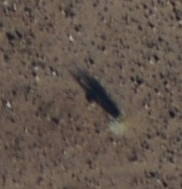

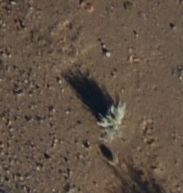

/data/old_home_dir/ChrissyF/GFRC/Test/whole_images/Z108_Img00277.jpg


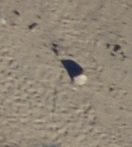

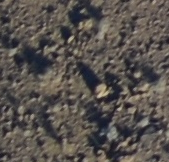

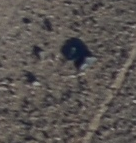

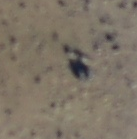

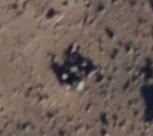

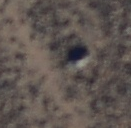

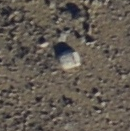

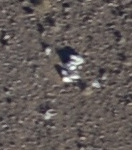

In [13]:
import cv2
import numpy as np
from PIL import Image


image_folder = '/data/old_home_dir/ChrissyF/GFRC/Test/whole_images/'
mancheck = np.zeros(gfrc_results_sort.shape[0])
imagefile = ""

for index, row in gfrc_results_sort[0:10].iterrows():
    rowimagefile = row.filename
    if rowimagefile != imagefile:
        rowpath = image_folder + rowimagefile
        rowimage = cv2.imread(rowpath)
        rowimage = cv2.cvtColor(rowimage, cv2.COLOR_BGR2RGB)
        imagefile=rowimagefile
    rowxmn = max(0, row.xmn - 50)
    rowxmx = min(7360, row.xmx + 50)
    rowymn = max(0, row.ymn - 50)
    rowymx = min(4912, row.ymx + 50)
    rowwindow = rowimage[rowymn:rowymx, rowxmn:rowxmx, :]
    display(Image.fromarray(rowwindow))
    